# Analyze Model's Results

The main purpose of this notebook is to demo the [Analyzer](https://github.com/VanLifeInc/models/tree/master/utils/analyzer.py) class. This will be our primary tool for analyzing the results of our models. Although we are currently using mobilenet_v2 as our model, it can be applied to any model that's built using Keras.

In [1]:
from keras.models import load_model
from keras_applications import mobilenet_v2 

from utils.analyzer import Analyzer

/Users/dave/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Create global variables

In [2]:
MODEL_DIRECTORY = 'saved_models'
MODEL_SAVED_FILEPATH = '2018_07_29_mobilenet_v2_8925'

IMAGE_TYPES = sorted(['bed', 'lamp', 'couch', 'table', 'chair'])
IMAGES_PER_TYPE = 20
IMAGE_SIZE = 224
MODEL = mobilenet_v2

## Load model

In [3]:
model = load_model('{}/{}.h5'.format(MODEL_DIRECTORY, MODEL_SAVED_FILEPATH), 
                   custom_objects={'relu6': mobilenet_v2.relu6})

## Call analyzer

In [4]:
analyzer = Analyzer()

## Load images
Useful tip:
- Processed images are used for training/testing the model.
- Unprocessed images are used to display the results.

In [5]:
images_processed, classes_processed = analyzer.load_images(
    image_types=IMAGE_TYPES,
    directory='../downloaded_images/fine_tuning/',
    images_per_type=IMAGES_PER_TYPE,
    image_size=IMAGE_SIZE,
    process=True,
    model=MODEL
)

Mapping:
{'bed': 0, 'chair': 1, 'couch': 2, 'lamp': 3, 'table': 4}


In [6]:
images_unprocessed, _ = analyzer.load_images(
    image_types=IMAGE_TYPES,
    directory='../downloaded_images/fine_tuning/',
    images_per_type=IMAGES_PER_TYPE,
    image_size=IMAGE_SIZE,
    process=False,
    model=MODEL
)

## Make predictions

In [7]:
predictions = analyzer.predict(model, images_processed)

## Analyze results
### Print accuracy

In [15]:
analyzer.accuracy(predictions, classes_processed)

Overall Accuracy: 96.0%


In [10]:
analyzer.accuracy(predictions=predictions,
                  answers=classes_processed,
                  simple=False,
                  image_types=IMAGE_TYPES)

Accuracy per classification:
bed: 19/20, 95.0%
Accuracy per classification:
chair: 19/20, 95.0%
Accuracy per classification:
couch: 19/20, 95.0%
Accuracy per classification:
lamp: 20/20, 100.0%
Accuracy per classification:
table: 19/20, 95.0%


### Print sample of predictions

Image 1:
Correct answer: table
Prediction:	table

bed 0.0071841837
chair 0.21523833
couch 0.036485817
lamp 0.05813093
table 0.6829607


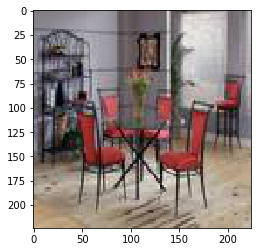

------------------------------
Image 2:
Correct answer: chair
Prediction:	chair

bed 0.057856742
chair 0.853621
couch 0.07787113
lamp 0.0046435026
table 0.006007678


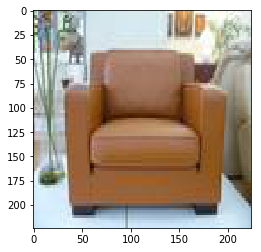

------------------------------
Image 3:
Correct answer: table
Prediction:	table

bed 0.038366586
chair 0.07423459
couch 0.3072423
lamp 0.11266119
table 0.46749532


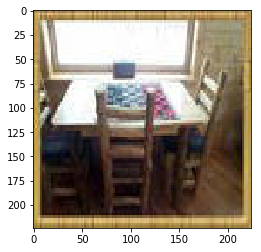

------------------------------
Image 4:
Correct answer: table
Prediction:	table

bed 0.00072210917
chair 0.0022869909
couch 0.00048237076
lamp 0.0023048741
table 0.9942036


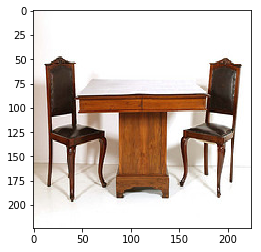

------------------------------
Image 5:
Correct answer: chair
Prediction:	chair

bed 5.8055143e-06
chair 0.9999001
couch 2.8006767e-05
lamp 4.44891e-05
table 2.159266e-05


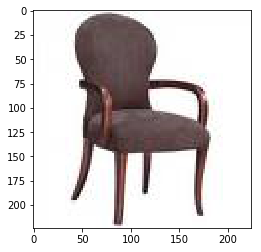

------------------------------
Image 6:
Correct answer: table
Prediction:	table

bed 0.004786035
chair 0.07583314
couch 0.028566187
lamp 0.004083569
table 0.8867311


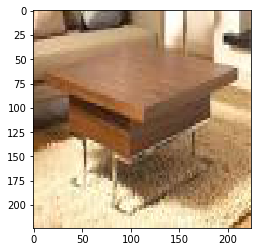

------------------------------
Image 7:
Correct answer: bed
Prediction:	bed

bed 0.99449533
chair 0.00013716849
couch 0.0009316354
lamp 0.0023376257
table 0.0020982237


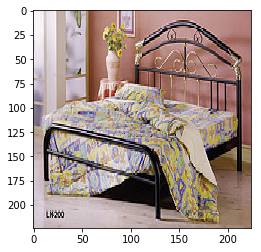

------------------------------
Image 8:
Correct answer: table
Prediction:	table

bed 0.0011552816
chair 0.0124468785
couch 0.0011000995
lamp 0.007456648
table 0.9778411


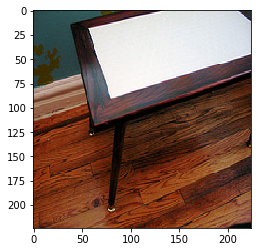

------------------------------
Image 9:
Correct answer: chair
Prediction:	chair

bed 0.00034988343
chair 0.97288847
couch 0.009154894
lamp 0.015129379
table 0.0024773695


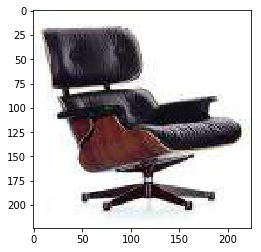

------------------------------
Image 10:
Correct answer: bed
Prediction:	bed

bed 0.99503857
chair 0.00014889453
couch 0.002154164
lamp 0.0021421302
table 0.00051617605


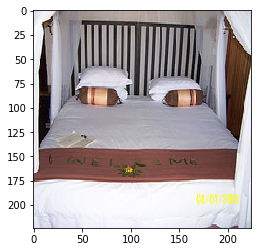

------------------------------


In [13]:
analyzer.show_results(predictions=predictions,
                      answers=classes_processed,
                      image_types=IMAGE_TYPES,
                      images=images_unprocessed,
                      #correctness='incorrect',
                      specific_image_types=['bed', 'chair', 'table'],
                      sample_count=6
                     )

### Print all incorrect predictions

Image 1:
Correct answer: bed
Prediction:	lamp

bed 0.051858168
chair 0.009444123
couch 0.0678833
lamp 0.63815844
table 0.23265599


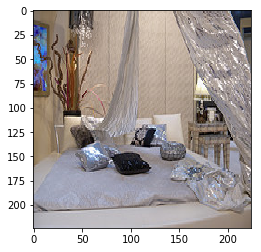

------------------------------
Image 2:
Correct answer: chair
Prediction:	table

bed 0.013626207
chair 0.42327675
couch 0.015156589
lamp 0.06411899
table 0.48382142


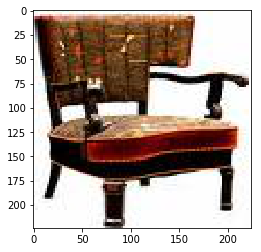

------------------------------
Image 3:
Correct answer: couch
Prediction:	lamp

bed 0.38861358
chair 0.0028648542
couch 0.06863544
lamp 0.5375251
table 0.0023609581


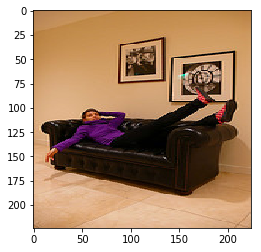

------------------------------
Image 4:
Correct answer: table
Prediction:	lamp

bed 0.33991548
chair 0.0031757064
couch 0.08875511
lamp 0.4992692
table 0.06888446


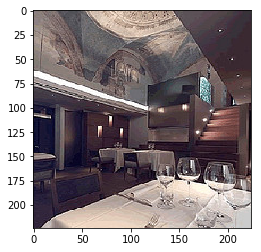

------------------------------


In [14]:
analyzer.show_results(predictions=predictions,
                      answers=classes_processed,
                      image_types=IMAGE_TYPES,
                      images=images_unprocessed,
                      correctness='incorrect',
                      #specific_image_types=['bed', 'chair', 'table'],
                      #sample_count=6
                     )